In [1]:
## importing basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)


### Data Ingestion

In [2]:
data = pd.read_csv('HAM10000_metadata(1)')

In [3]:
##Seeing the first heading dataset

In [4]:
data.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern

In [5]:
connection = data.groupby(['localization','dx']).size()

In [6]:
localization_index = data['localization'].unique()

In [7]:
localization_index

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [8]:
copy = data.copy()

In [9]:
for i in localization_index:
    data_frame = copy[copy['localization']==i]
    print(f'*************{i}**********************')
    connection = data_frame.groupby(['localization','dx']).size()
    
    print(connection)

*************scalp**********************
localization  dx   
scalp         akiec    14
              bcc      19
              bkl      34
              mel      14
              nv       45
              vasc      2
dtype: int64
*************ear**********************
localization  dx   
ear           akiec     3
              bkl       6
              mel      17
              nv       30
dtype: int64
*************face**********************
localization  dx   
face          akiec    113
              bcc      101
              bkl      319
              mel      104
              nv       100
              vasc       8
dtype: int64
*************back**********************
localization  dx   
back          akiec      29
              bcc       186
              bkl       202
              df          2
              mel       324
              nv       1427
              vasc       22
dtype: int64
*************trunk**********************
localization  dx   
trunk         akiec       1
 

In [57]:
copy.groupby(['sex']).size()

sex
female     4552
male       5406
unknown      57
dtype: int64

# cancerous and benign

In [58]:
cancerous = ['akiec','bcc','mel']

In [70]:
cancerous_df = copy[copy.dx.isin(cancerous)]

In [71]:
cancerous_df

lesion_id      image_id     dx dx_type   age     sex  \
1211   HAM_0000871  ISIC_0025964    mel   histo  40.0  female   
1212   HAM_0000871  ISIC_0030623    mel   histo  40.0  female   
1213   HAM_0000040  ISIC_0027190    mel   histo  80.0    male   
1214   HAM_0005678  ISIC_0031023    mel   histo  60.0    male   
1215   HAM_0005678  ISIC_0028086    mel   histo  60.0    male   
...            ...           ...    ...     ...   ...     ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female   

          localization       dataset  
1211             chest  vidir_modern  
1212             chest  vidir_modern  
1213   upper extremity     rosendahl  
1214             chest  vidir_modern  
1215             chest  vidir_modern  
...                ...           ...  
10010          abdomen  vidir_modern  
10011          abdomen  vidir_modern  
10012          abdomen  vidir_modern  
10013             face  vidir_modern  
10014             back  vidir_modern  

[1954 rows x 8 columns]

In [72]:
cancerous_df.groupby('sex').size()

sex
female     727
male      1227
dtype: int64

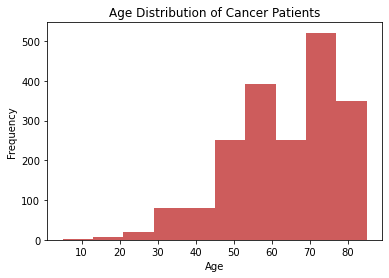

In [91]:
plt.hist(cancerous_df['age'], bins=10, color='indianred')

# Add a title to the histogram
plt.title('Age Distribution of Cancer Patients')

# Add labels to the x and y axes
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

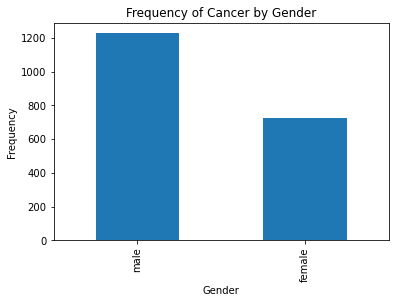

In [88]:
cancerous_df['sex'].value_counts().plot(kind='bar');
plt.title('Frequency of Cancer by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [65]:
benign = ['bkl','df','vasc','nv']

In [66]:
benign

['bkl', 'df', 'vasc', 'nv']

In [75]:
benign_df = copy[copy.dx.isin(benign)]

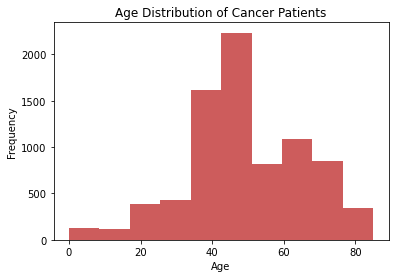

In [92]:
plt.hist(benign_df['age'], bins=10, color='indianred')

# Add a title to the histogram
plt.title('Age Distribution of Cancer Patients')

# Add labels to the x and y axes
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

In [76]:
benign_df.groupby('sex').size()

sex
female     3825
male       4179
unknown      57
dtype: int64

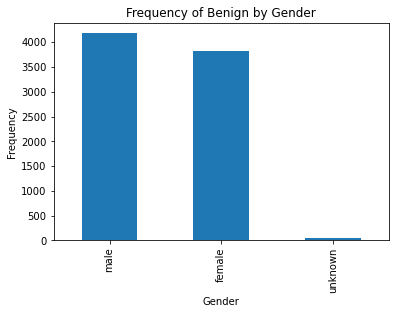

In [89]:
benign_df['sex'].value_counts().plot(kind='bar');
plt.title('Frequency of Benign by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [86]:
data1 = {'Benign Count':[len(benign_df)] , 'Cancerous Count': [len(cancerous_df)]}

<AxesSubplot:>

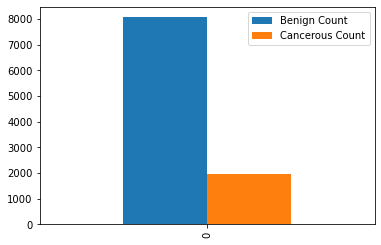

In [87]:
dataframe = pd.DataFrame(data1)
dataframe.plot(kind='bar')

In [10]:
data.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset'],
      dtype='object')

In [11]:
data['dx_type'].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

# Description of the attributes

'lesion_id': a unique identifier for each individual skin lesion.

'image_id': a unique identifier for the image of the skin lesion.

'dx': the diagnosis label for the lesion, which can be one of seven different types (akiec, bcc, bkl, df, mel, nv, vasc).

'dx_type': the type of the diagnosis label, either 'histo' for histopathological or 'follow_up' for follow-up image.

'age': the age of the patient at the time the image was taken.

'sex': the sex of the patient.

'localization': the location on the body where the lesion is present.

'dataset': the source dataset of the image, either 'HAM10000' or 'ISIC2018'.

# Checking Unique values per column

In [12]:
for i in data.columns:
  print(f'The name of columns is  {i}')
  print(f'The unique value of the columns are {data[i].unique()}')
  print('*************************')

The name of columns is  lesion_id
The unique value of the columns are ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
*************************
The name of columns is  image_id
The unique value of the columns are ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
*************************
The name of columns is  dx
The unique value of the columns are ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
*************************
The name of columns is  dx_type
The unique value of the columns are ['histo' 'consensus' 'confocal' 'follow_up']
*************************
The name of columns is  age
The unique value of the columns are [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
*************************
The name of columns is  sex
The unique value of the columns are ['male' 'female' 'unknown']
*************************
The name of columns is  localization
The unique value of the 

### Categorical value and numerical value separation

In [13]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [14]:
categorical_feature

['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization', 'dataset']

In [15]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes!='O']

In [16]:
numerical_feature

['age']

**Observation**: Only age is numerical value, others are categorical values.

# Analysis of the variable

In [17]:
data['age'].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

/home/rajan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

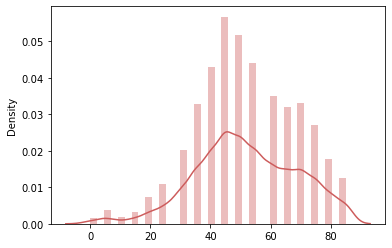

In [18]:
sns.distplot(x=data['age'], color='indianred')

Observation: Age variable is left skewed. So, outliers exists at the left

In [19]:
data['age'].isnull().sum()

57

Observation: 57 null value exist

## Analysis of categorical values

In [20]:
for i in categorical_feature:
  print(f'The name of columns is  {i}')
  print(f'The unique value of the columns are {data[i].unique()}')
  print('*************************')

The name of columns is  lesion_id
The unique value of the columns are ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
*************************
The name of columns is  image_id
The unique value of the columns are ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
*************************
The name of columns is  dx
The unique value of the columns are ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
*************************
The name of columns is  dx_type
The unique value of the columns are ['histo' 'consensus' 'confocal' 'follow_up']
*************************
The name of columns is  sex
The unique value of the columns are ['male' 'female' 'unknown']
*************************
The name of columns is  localization
The unique value of the columns are ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']
***************

In [21]:
data['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [22]:
data['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [23]:
(len(data))

10015

In [24]:
data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

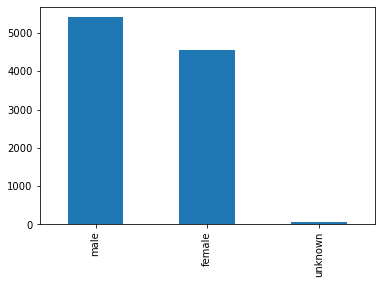

In [25]:
data['sex'].value_counts().plot(kind='bar');


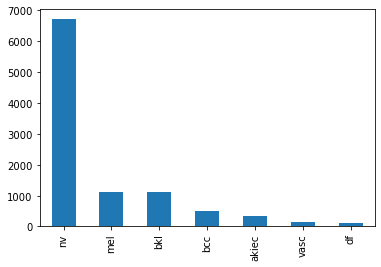

In [26]:
data['dx'].value_counts().plot(kind='bar');


Observation: nv is profoundly found in our dataset

Observation: Data are highly imbalanced.

In [27]:
data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

## Explanation:
 * The labels 'bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec' are the seven different types of skin lesion found in the HAM10000 dataset.*

**'bkl'** stands for benign keratosis-like lesion. It is a common, benign skin condition characterized by scaly or crusty bumps.

**'nv'** stands for melanocytic nevi, which are benign tumors of the pigment cells that can appear as dark spots on the skin.

**'df'** stands for dermatofibroma, which is a benign skin growth that appears as a small, hard bump.
**'mel'** stands for malignant melanoma, which is a type of skin cancer that can appear as a dark, irregularly shaped spot or mole.

**'vasc'** stands for vascular lesion, which is a lesion related to blood vessels.

**'bcc'** stands for basal cell carcinoma, which is the most common type of skin cancer.

**'akiec'** stands for Actinic Keratosis, which is a precancerous lesion that appears as a scaly or crusty bump, often caused by prolonged sun exposure.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [29]:
data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

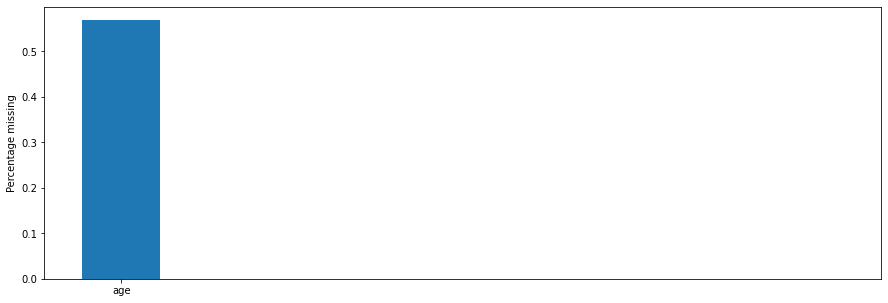

In [30]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks(['age'])
plt.ylabel("Percentage missing")
plt.ylabel
plt.show()

Observation: The missing value is in negligible ammount.

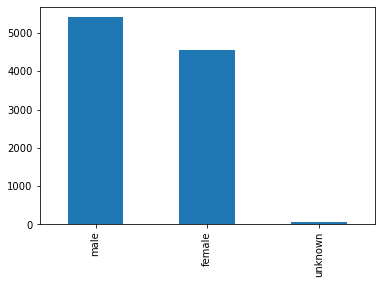

In [31]:
data['sex'].value_counts().plot(kind='bar');

Observation: Unknown is ambigous value.

In [32]:
data['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [33]:
data['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

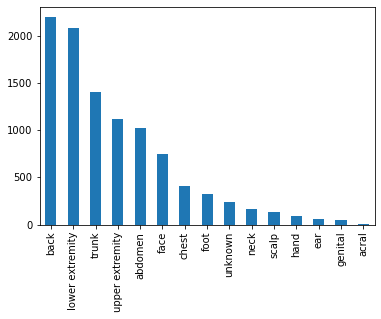

In [34]:
data['localization'].value_counts().plot(kind='bar');


Observation: Dataset is imbalanced.

# Feature Engineering

In [30]:
data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [37]:
df= data.copy()

#  replacing the dataset with 'Sex' unknown to others.

In [40]:
df['sex'] = df['sex'].str.replace('unknown','Others')

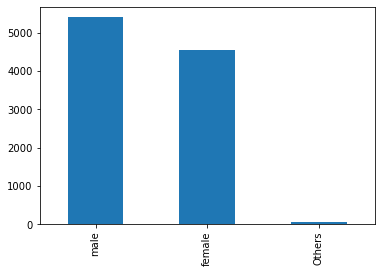

In [41]:
df['sex'].value_counts().plot(kind='bar');


In [42]:
len(df)

10015

In [43]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

In [44]:
df['age'].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

In [45]:
#the null value of age is very less --just 10

# Filling null values.

In [46]:
df['age'].fillna(df['age'].median(), inplace = True)

In [47]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

In [48]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [49]:
dff = df.copy()

In [51]:
rare_value_list = ['ear', 'genital', 'acral']

## Making the rare value of location to others

In [53]:
df['localization'] = df['localization'].str.replace('ear','Others')
df['localization'] = df['localization'].str.replace('genital','Others')
df['localization'] = df['localization'].str.replace('acral','Others')


In [54]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
Others              111
hand                 90
Name: localization, dtype: int64

In [55]:
# Also merging unknowing to others
df['localization'] = df['localization'].str.replace('unknown','Others')


## Removing unwanted columns

In [56]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male       Others   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern

In [57]:
df.drop(['lesion_id','dx_type','dataset'], axis = 1)

image_id     dx   age     sex localization
0      ISIC_0027419    bkl  80.0    male        scalp
1      ISIC_0025030    bkl  80.0    male        scalp
2      ISIC_0026769    bkl  80.0    male        scalp
3      ISIC_0025661    bkl  80.0    male        scalp
4      ISIC_0031633    bkl  75.0    male       Others
...             ...    ...   ...     ...          ...
10010  ISIC_0033084  akiec  40.0    male      abdomen
10011  ISIC_0033550  akiec  40.0    male      abdomen
10012  ISIC_0033536  akiec  40.0    male      abdomen
10013  ISIC_0032854  akiec  80.0    male         face
10014  ISIC_0032258    mel  70.0  female         back

[10015 rows x 5 columns]

In [59]:
df.to_csv('curated_dataset.csv')